## Multiclass Classification Problem

### Image Classification Using The Famous Fashion mnist Dataset

Each training and test example is assigned to one of the following labels:

0 T-shirt/top <br>
1 Trouser <br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
train = pd.read_csv("fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(60000, 785)

In [4]:
test = pd.read_csv("fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(10000, 785)

In [6]:
X_train = train.drop(columns="label")
y_train = train["label"]

X_test = test.drop(columns="label")
y_test = test["label"]

In [13]:
X_train_list = X_train.values.tolist()
X_train_list[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 62,
 61,
 21,
 29,
 23,
 51,
 136,
 61,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 88,
 201,
 228,
 225,
 255,
 115,
 62,
 137,
 255,
 235,
 222,
 255,
 135,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 47,
 252,
 234,
 238,
 224,
 215,
 215,
 229,
 108,
 180,
 207,
 214,
 224,
 231,
 249,
 254,
 45,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 214,
 222,
 210,
 213,
 224,
 225,
 217,
 220,
 254,
 233,
 219,
 221,
 217,
 223,
 221,
 240,
 254,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 128,
 237,
 207,
 224,
 224,
 207,
 216,
 214,
 210,
 208,
 211,
 221,
 208,
 219,
 213,
 226,
 211,

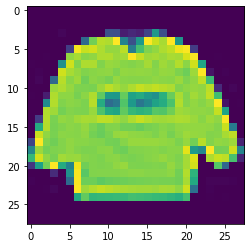

In [15]:
plt.imshow(np.reshape(X_train_list[0], (28, 28, 1)));

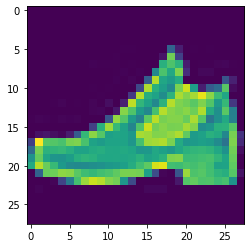

In [16]:
plt.imshow(np.reshape(X_train_list[1], (28, 28, 1)));

In [21]:
logreg = LogisticRegression(random_state=12).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
logreg.score(X_train, y_train)

0.8621166666666666

In [23]:
logreg.score(X_test, y_test)

0.8544

In [25]:
logreg.predict([X_train_list[3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [27]:
y_pred = logreg.predict(X_test)

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[817,  11,  18,  31,   7,   0,  96,   0,  19,   1],
       [  1, 976,   4,  13,   0,   2,   4,   0,   0,   0],
       [ 15,   2, 762,  13, 122,   0,  74,   0,  12,   0],
       [ 30,  28,  16, 871,  29,   0,  23,   0,   3,   0],
       [  1,   2,  72,  34, 822,   1,  65,   0,   3,   0],
       [  2,   2,   0,   0,   0, 883,   1,  64,  10,  38],
       [148,   7, 105,  31, 109,   0, 584,   0,  16,   0],
       [  0,   0,   0,   0,   0,  27,   0, 932,   1,  40],
       [  2,   2,   9,   2,   5,   7,  17,   4, 950,   2],
       [  0,   0,   0,   0,   0,  14,   0,  36,   3, 947]], dtype=int64)

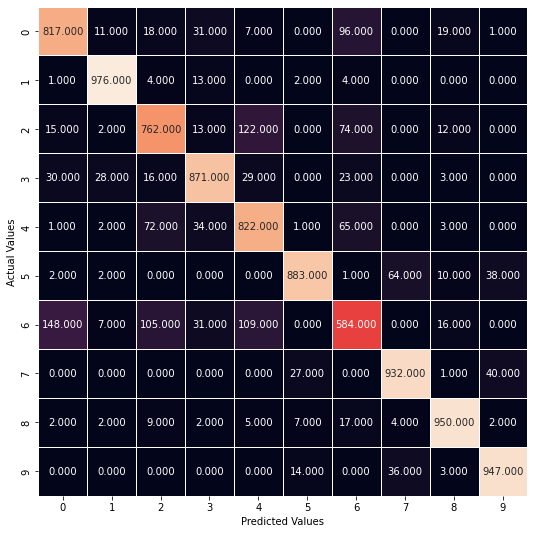

In [33]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt= "0.3f", linewidths=0.5, square=True, cbar=False)

plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

###  Manual Score Calculation

In [ ]:
# Precision = TP / (TP + FP)

In [36]:
precision_for_label_9 = 947 / (947 + 1 + 38 + 40 + 2)
precision_for_label_9

0.9212062256809338

In [37]:
precision_for_label_2 = 762 / (762 + 18 + 4 + 16 + 72 + 105 + 9)
precision_for_label_2

0.7728194726166329

In [ ]:
# Recall = TP / (TP + FN)

In [38]:
recall_for_label_9 = 947 / (947 + 14 + 36 + 3)
recall_for_label_9

0.947

In [39]:
recall_for_label_2 = 762 / (762 + 15 + 2 + 13 + 122 + 74 + 12)
recall_for_label_2

0.762

In [ ]:
# F1 Score = 2 * ((Precision * Recall) / (Precision + Recall))

In [41]:
F1_label_9 = 2 * precision_for_label_9 * recall_for_label_9 / (precision_for_label_9 + recall_for_label_9)
F1_label_9

0.9339250493096647

In [42]:
F1_label_2 = 2 * precision_for_label_2 * recall_for_label_2 / (precision_for_label_2 + recall_for_label_2)
F1_label_2

0.7673716012084593

### Automatic Score Calculation

In [44]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.95      0.98      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.88      0.87      0.87      1000
           4       0.75      0.82      0.79      1000
           5       0.95      0.88      0.91      1000
           6       0.68      0.58      0.63      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [45]:
# macro avg f1 score(Arithmetic mean of all the f1 scores) = (0.81 + 0.96 + 0.77 ... + 0.93) / 10

In [46]:
# weighted average f1 score(Considers the sample size of each label) = (1000 * 0.81 + 1000 * 0.96 ...+ 0.93 * 1000) / 10000